In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Loading the Dataset

In [3]:
df = pd.read_csv('smsspamcollection (1).tsv',sep="\t")

# Display top 5 records

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


# Display last 5 records

In [5]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


# Display all the Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


# 5 Points Summary Data

In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


# To check null values

In [ ]:
df.isnull().sum()

# Display Numbers of Rows and Columns

In [8]:
df.shape

(5572, 4)

# Value Count 

In [9]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

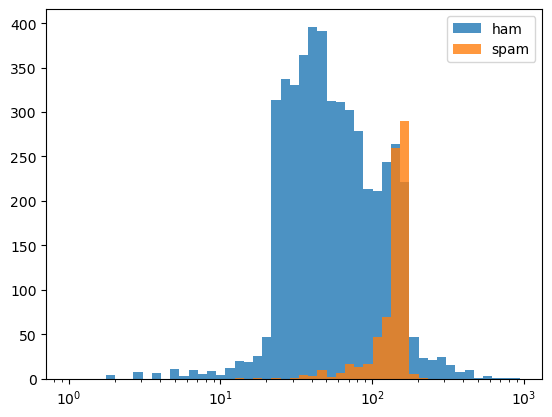

In [12]:
%matplotlib inline
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [13]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

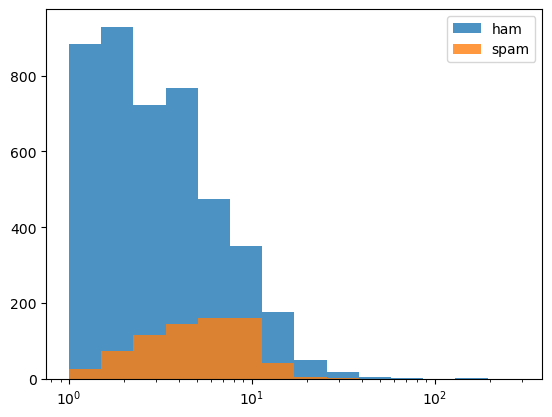

In [14]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

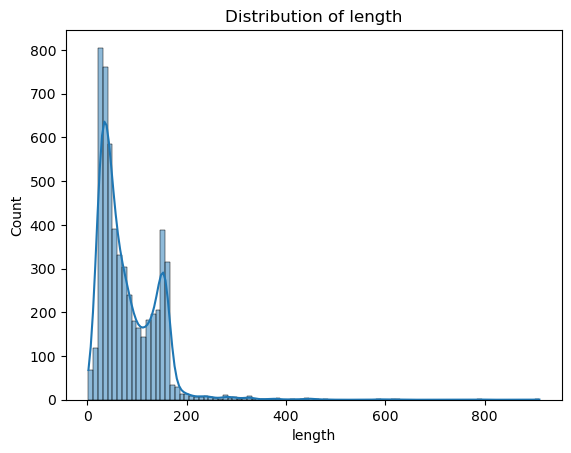

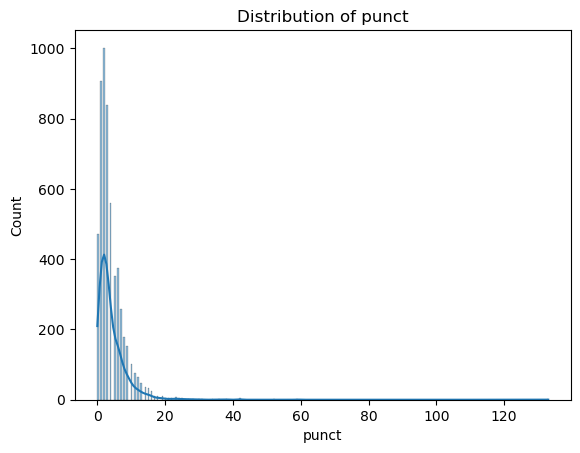

In [15]:
for col in df.columns:
     if df[col].dtype != "object": # Exclude non-numeric columns if any
         plt.figure()
         sns.histplot(df[col],kde=True) # kde adds a kernel density estimate curve
         plt.title(f'Distribution of {col}')
plt.show()

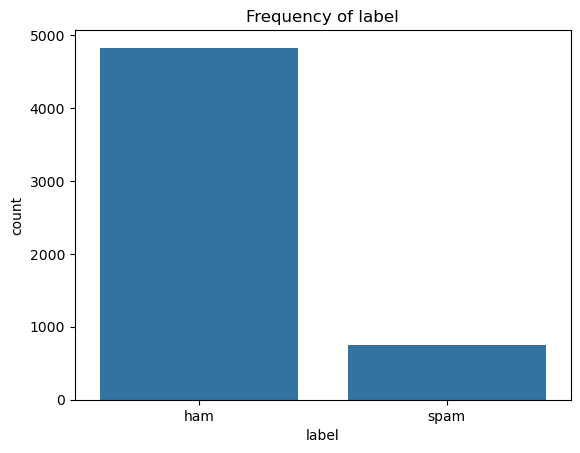

In [16]:
#Bar Charts (for categorical variables):
plt.figure()
sns.countplot(x='label',data=df)
plt.title('Frequency of label')
plt.show()

In [17]:
X = df[['length','punct']]
y = df['label']

In [18]:
# Convert text messages into numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Encode the labels ('ham'/'spam' → 0/1)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=2)
print('Training Data Shape:',X_train.shape)
print('Testing Data Shape:',X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape: (1839, 2)


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
from sklearn import metrics
# Create a prediction set:
predictions = lr.predict(X_test)
# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1534   52]
 [ 248    5]]


In [24]:
df= pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

In [25]:
# Print a classification report 
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.86      0.97      0.91      1586
        spam       0.09      0.02      0.03       253

    accuracy                           0.84      1839
   macro avg       0.47      0.49      0.47      1839
weighted avg       0.75      0.84      0.79      1839



In [26]:
# Print(the overall acc
print(metrics.accuracy_score(y_test,predictions))

0.8368678629690048


In [27]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [28]:
nb_prediction = nb_model.predict(X_test)

In [29]:
print(metrics.confusion_matrix(y_test,nb_prediction))

[[1573   13]
 [ 250    3]]


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, svm_prediction))

In [30]:
print(metrics.classification_report(y_test,nb_prediction))

              precision    recall  f1-score   support

         ham       0.86      0.99      0.92      1586
        spam       0.19      0.01      0.02       253

    accuracy                           0.86      1839
   macro avg       0.53      0.50      0.47      1839
weighted avg       0.77      0.86      0.80      1839



In [31]:
from sklearn.svm import SVC
svm_model = SVC(gamma='auto')
svm_model.fit(X_train,y_train)

SVC(gamma='auto')

In [34]:
svm_prediction = svm_model.predict(X_test)
print(metrics.confusion_matrix(y_test,svm_prediction))

[[1531   55]
 [ 155   98]]


In [35]:
print(metrics.classification_report(y_test,svm_prediction))

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94      1586
        spam       0.64      0.39      0.48       253

    accuracy                           0.89      1839
   macro avg       0.77      0.68      0.71      1839
weighted avg       0.87      0.89      0.87      1839



In [36]:
print(metrics.accuracy_score(y_test,svm_prediction))

0.8858075040783034
